<a href="https://colab.research.google.com/github/RonKG/Craigslist-Cars-For-Sale-Data-Project/blob/main/Craigslist_Cars_For_Sale_Data_Project_Part_3_Data%C2%A0Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'> Import libraries </font>

In [128]:
# work with dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# regular expressions
import re

# we'll use this to store the a dataframe to csv at a later stage
import csv

# You can change the preview float_format of numericals in pandas set_option
# from scientific notation to 4 decimals
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#  plot your charts into your Jupyter Notebook
%matplotlib inline

#  <font color='red'> Load data and perform additional cleaning </font>

In [335]:
# data from webscrapping is stored in GoogleDrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [412]:
# import the Craigslist scrapped csv from the webscrapping section
df = pd.read_csv('/content/drive/MyDrive/Data Science/craigslistproject/original_data.csv', 
                 sep='\t', 
                 engine='python')


# preview the data frame size
print('Number of rows --> ', df.shape[0], 
      '\nNumber of columns --> ', df.shape[1],
      '\n\n')


# prevew the data
df.head()

Number of rows -->  24427 
Number of columns -->  19 




,VIN,city,condition,cylinders,date time,drive,fuel,lat,long,odometer,pID,paint color,post_body,price,size,title status,transmission,type,year make model
0,NaN,dallas,excellent,8 cylinders,2021-09-24 23:08,fwd,gas,32.82572,-97.48160,2200,7385198555.00000,black,Navigator L Nice n clean With navigation syste...,5200,full-size,salvage,automatic,SUV,2007 Lincoln navigator
1,KL8CB6SA9HC828034,dallas,good,4 cylinders,2021-09-24 23:05,fwd,gas,32.74812,-97.07658,105119,7385198033.00000,grey,Won t last long,3250,compact,clean,automatic,NaN,2017 chevy spark ls
2,NaN,dallas,NaN,NaN,2021-09-24 22:53,NaN,gas,32.60410,-96.86530,131913,7385195889.00000,NaN,Am Selling MY Beautiful 2010 Nissan Xterra In ...,6950,NaN,clean,automatic,NaN,2010 Nissan Xterra SE 4x4
3,NaN,dallas,NaN,NaN,2021-09-24 22:50,NaN,gas,32.58990,-96.85690,138418,7385195357.00000,NaN,Am Selling My Beautiful Ford 2005 F150 Crew Ca...,6950,NaN,clean,automatic,NaN,2005 Ford F150 Supercrew cab xlt
4,NaN,dallas,NaN,NaN,2021-09-24 22:47,NaN,gas,32.58990,-96.85690,240312,7385194815.00000,NaN,Am Selling My Beautiful 2003 GMC SEIRRA Condit...,3500,NaN,clean,automatic,NaN,2003 GMC SIERRA


In [413]:
# preview 'date time column'
df['date time'].head(10)

0    2021-09-24 23:08
1    2021-09-24 23:05
2    2021-09-24 22:53
3    2021-09-24 22:50
4    2021-09-24 22:47
5    2021-09-24 22:17
6    2021-09-24 21:51
7    2021-09-24 21:51
8    2021-09-24 21:35
9    2021-09-24 21:35
Name: date time, dtype: object

In [414]:
# create two columns, data and time by slicing the 'date time' column
df['date'] = df['date time'].str.split(' ').str[0]
df['time'] = df['date time'].str.split(' ').str[1].str.replace(';',':')

df['date time'] =  pd.to_datetime(df['date time'], format='%Y-%m-%dT%H:%M')
df['time'] = pd.to_datetime(df.time, format="%H:%M")

# preview the new columns
df[['date time','date','time']].head(10)

,date time,date,time
0,2021-09-24 23:08:00,2021-09-24,1900-01-01 23:08:00
1,2021-09-24 23:05:00,2021-09-24,1900-01-01 23:05:00
2,2021-09-24 22:53:00,2021-09-24,1900-01-01 22:53:00
3,2021-09-24 22:50:00,2021-09-24,1900-01-01 22:50:00
4,2021-09-24 22:47:00,2021-09-24,1900-01-01 22:47:00
5,2021-09-24 22:17:00,2021-09-24,1900-01-01 22:17:00
6,2021-09-24 21:51:00,2021-09-24,1900-01-01 21:51:00
7,2021-09-24 21:51:00,2021-09-24,1900-01-01 21:51:00
8,2021-09-24 21:35:00,2021-09-24,1900-01-01 21:35:00
9,2021-09-24 21:35:00,2021-09-24,1900-01-01 21:35:00


In [415]:
# create numeric weekdays - this will come in handy in the analysis
df['weekday'] = df['date'].apply(pd.to_datetime).dt.dayofweek

# then preview new columns
df[['date time','date','time','weekday']].head(10)

,date time,date,time,weekday
0,2021-09-24 23:08:00,2021-09-24,1900-01-01 23:08:00,4
1,2021-09-24 23:05:00,2021-09-24,1900-01-01 23:05:00,4
2,2021-09-24 22:53:00,2021-09-24,1900-01-01 22:53:00,4
3,2021-09-24 22:50:00,2021-09-24,1900-01-01 22:50:00,4
4,2021-09-24 22:47:00,2021-09-24,1900-01-01 22:47:00,4
5,2021-09-24 22:17:00,2021-09-24,1900-01-01 22:17:00,4
6,2021-09-24 21:51:00,2021-09-24,1900-01-01 21:51:00,4
7,2021-09-24 21:51:00,2021-09-24,1900-01-01 21:51:00,4
8,2021-09-24 21:35:00,2021-09-24,1900-01-01 21:35:00,4
9,2021-09-24 21:35:00,2021-09-24,1900-01-01 21:35:00,4


In [416]:
# also create a categorical weekday label (mon, tue, etc..)

# for this we create a (dayNumber, dayName) dictionary 
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

# and map it to a new dayOfWeek column
df['dayOfWeek'] = df["weekday"].map(dayOfWeek)

# then preview new columns
df[['date time','date','time','weekday','dayOfWeek']]

,date time,date,time,weekday,dayOfWeek
0,2021-09-24 23:08:00,2021-09-24,1900-01-01 23:08:00,4,Friday
1,2021-09-24 23:05:00,2021-09-24,1900-01-01 23:05:00,4,Friday
2,2021-09-24 22:53:00,2021-09-24,1900-01-01 22:53:00,4,Friday
3,2021-09-24 22:50:00,2021-09-24,1900-01-01 22:50:00,4,Friday
4,2021-09-24 22:47:00,2021-09-24,1900-01-01 22:47:00,4,Friday
...,...,...,...,...,...
24422,2021-09-16 21:14:00,2021-09-16,1900-01-01 21:14:00,3,Thursday
24423,2021-09-16 21:05:00,2021-09-16,1900-01-01 21:05:00,3,Thursday
24424,2021-09-16 21:02:00,2021-09-16,1900-01-01 21:02:00,3,Thursday
24425,2021-09-16 20:57:00,2021-09-16,1900-01-01 20:57:00,3,Thursday


In [417]:
# preview 
df['year make model'].head(20)

0               2007 Lincoln navigator
1                  2017 chevy spark ls
2            2010 Nissan Xterra SE 4x4
3     2005 Ford F150 Supercrew cab xlt
4                      2003 GMC SIERRA
5                2007 gmc yukon denali
6                          2001 bmw m5
7                      2003 gmc sierra
8             1991 toyota land cruiser
9                2011 2011 buick regal
10                    2013 lincoln mkx
11    2015 Ford f150 xlt 4x4 supercrew
12            2010 toyota prius hybrid
13                   1981 dodge pickup
14                   2008 Cadillac DTS
15           2008 Chevrolet Equinox LT
16          2014 toyota sienna limited
17        2004 ford mustang gt premium
18                  2009 nissan xterra
19                         2009 toyota
Name: year make model, dtype: object

In [418]:
#clean duplicate year in 'year make model'
df['year_c make model'] = df['year make model'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1', regex=True)

# preview 
df['year_c make model'].head(20)

0               2007 Lincoln navigator
1                  2017 chevy spark ls
2            2010 Nissan Xterra SE 4x4
3     2005 Ford F150 Supercrew cab xlt
4                      2003 GMC SIERRA
5                2007 gmc yukon denali
6                          2001 bmw m5
7                      2003 gmc sierra
8             1991 toyota land cruiser
9                     2011 buick regal
10                    2013 lincoln mkx
11    2015 Ford f150 xlt 4x4 supercrew
12            2010 toyota prius hybrid
13                   1981 dodge pickup
14                   2008 Cadillac DTS
15           2008 Chevrolet Equinox LT
16          2014 toyota sienna limited
17        2004 ford mustang gt premium
18                  2009 nissan xterra
19                         2009 toyota
Name: year_c make model, dtype: object

In [419]:
# create three columns, year, make & model by slicing 'year make model'
# also format to upper case
df['year'] = df['year_c make model'].str.split(' ').str[0].str.upper()
df['make'] = df['year_c make model'].str.split(' ').str[1].str.upper()
df['model'] = df['year_c make model'].str.split(' ').str[2].str.upper()

# preview the new columns
df[['year_c make model','year','make','model']].head(20)

,year_c make model,year,make,model
0,2007 Lincoln navigator,2007,LINCOLN,NAVIGATOR
1,2017 chevy spark ls,2017,CHEVY,SPARK
2,2010 Nissan Xterra SE 4x4,2010,NISSAN,XTERRA
3,2005 Ford F150 Supercrew cab xlt,2005,FORD,F150
4,2003 GMC SIERRA,2003,GMC,SIERRA
5,2007 gmc yukon denali,2007,GMC,YUKON
6,2001 bmw m5,2001,BMW,M5
7,2003 gmc sierra,2003,GMC,SIERRA
8,1991 toyota land cruiser,1991,TOYOTA,LAND
9,2011 buick regal,2011,BUICK,REGAL


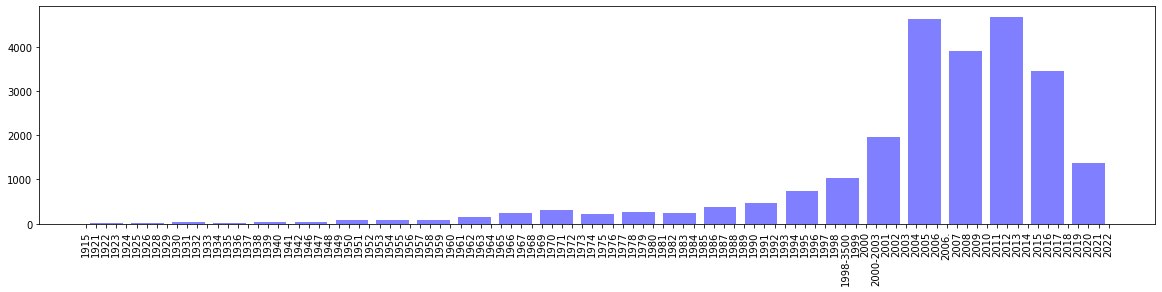

In [420]:
fig, ax = plt.subplots(1,1,figsize=(20,4))
histogram = plt.hist(df['year'].sort_values(),bins = 25, rwidth=0.8,facecolor='blue', alpha=0.5)
histogram = plt.xticks(rotation = 90)

In [421]:
df['length'] = df.year.str.len()
print('\nunique year lengths --> ', df['length'].unique())

df[df['length']>4]

unique year lengths -->  [4 5 9]


,VIN,city,condition,cylinders,date time,drive,fuel,lat,long,odometer,pID,paint color,post_body,price,size,title status,transmission,type,year make model,date,time,weekday,dayOfWeek,year_c make model,year,make,model,length
2699,NaN,chicago,NaN,NaN,2021-09-19 11:36:00,NaN,gas,41.76640,-88.34460,189000,7382525554.00000,NaN,selling original shape Firm price All question...,900,NaN,clean,automatic,coupe,2006 2006. Element,2021-09-19,1900-01-01 11:36:00,6,Sunday,2006. Element,2006.,ELEMENT,NaN,5
15754,NaN,washingtondc,fair,8 cylinders,2021-09-12 17:10:00,4wd,diesel,39.03730,-77.48050,188000,7379395945.00000,white,NEW LOWER PRICE OFFSEASON PRICED,4300,NaN,clean,automatic,pickup,1998 1998-3500 GMC SIERRA DIESEL,2021-09-12,1900-01-01 17:10:00,6,Sunday,1998-3500 GMC SIERRA DIESEL,1998-3500,GMC,SIERRA,9
20560,NaN,atlanta,fair,NaN,2021-09-13 14:58:00,fwd,gas,33.84820,-84.35820,232002,7379803202.00000,silver,Im selling 3 vehicles for the price of one,3900,NaN,salvage,automatic,NaN,2000 2000-2003,2021-09-13,1900-01-01 14:58:00,0,Monday,2000-2003,2000-2003,NaN,NaN,9


In [422]:
df = df[df.length == 4]
df.drop(['length'],axis=1, inplace=True)

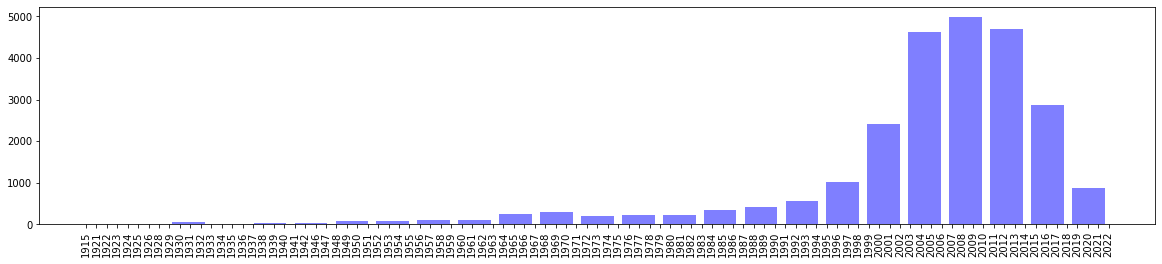

In [423]:
fig, ax = plt.subplots(1,1,figsize=(20,4))
histogram = plt.hist(df['year'].sort_values(),bins = 25, rwidth=0.8,facecolor='blue', alpha=0.5)
histogram = plt.xticks(rotation = 90)

In [424]:
# then preview columns data types
print(df.dtypes)

VIN                          object
city                         object
condition                    object
cylinders                    object
date time            datetime64[ns]
drive                        object
fuel                         object
lat                         float64
long                        float64
odometer                      int64
pID                         float64
paint color                  object
post_body                    object
price                         int64
size                         object
title status                 object
transmission                 object
type                         object
year make model              object
date                         object
time                 datetime64[ns]
weekday                       int64
dayOfWeek                    object
year_c make model            object
year                         object
make                         object
model                        object
dtype: object


In [425]:
# A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory
df['city'] = df['city'].astype('category')
df['condition'] = df['condition'].astype('category')
df['cylinders'] = df['cylinders'].astype('category')
df['drive'] = df['drive'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['paint color'] = df['paint color'].astype('category')
df['size'] = df['size'].astype('category')
df['title status'] = df['title status'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['type'] = df['type'].astype('category')
df['dayOfWeek'] = df['dayOfWeek'].astype('category') 
df['make'] = df['make'].astype('category') 

df['model'] = df['model'].astype('str') 

df.dtypes             

VIN                          object
city                       category
condition                  category
cylinders                  category
date time            datetime64[ns]
drive                      category
fuel                       category
lat                         float64
long                        float64
odometer                      int64
pID                         float64
paint color                category
post_body                    object
price                         int64
size                       category
title status               category
transmission               category
type                       category
year make model              object
date                         object
time                 datetime64[ns]
weekday                       int64
dayOfWeek                  category
year_c make model            object
year                         object
make                       category
model                        object
dtype: object

In [426]:
# view the how many columns have null values and % of nulls
print(pd.concat([df.isnull().sum().sort_values(), 
                df.isnull().sum().sort_values()/len(df)*100],
                axis=1, 
                keys=['null values', 'null values %']))

                   null values  null values %
price                        0        0.00000
year                         0        0.00000
year_c make model            0        0.00000
dayOfWeek                    0        0.00000
weekday                      0        0.00000
time                         0        0.00000
date                         0        0.00000
year make model              0        0.00000
transmission                 0        0.00000
title status                 0        0.00000
model                        0        0.00000
odometer                     0        0.00000
fuel                         0        0.00000
date time                    0        0.00000
city                         0        0.00000
long                        34        0.13921
lat                         34        0.13921
pID                         34        0.13921
make                        51        0.20881
post_body                  209        0.85572
condition                 4275    

In [427]:
# Get the basic descriptive and statistics for each numeric column
df.describe()

,lat,long,odometer,pID,price,weekday
count,24390.00000,24390.00000,24424.00000,24390.00000,24424.00000,24424.00000
mean,36.41096,-94.20389,139590.39551,7382001887.12542,24236.20193,2.86612
std,5.73315,17.71734,325329.64360,3120409.98254,1068544.58440,1.78870
min,-34.65668,-157.90693,0.00000,7370759716.00000,1.00000,0.00000
25%,33.00433,-112.06020,74200.00000,7380692815.75000,4500.00000,1.00000
50%,36.07615,-88.19520,120148.00000,7383031177.00000,8000.00000,3.00000
75%,40.72552,-77.48050,166000.00000,7384306209.75000,15700.00000,4.00000
max,84.80801,35.51106,10000000.00000,7385200851.00000,123456789.00000,6.00000


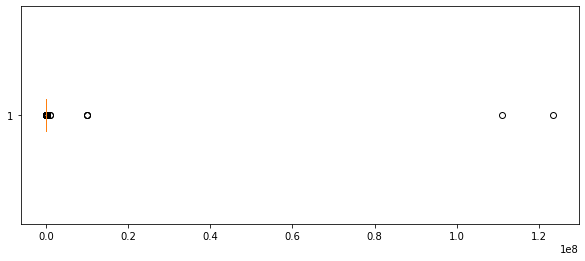

In [428]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
boxplot = plt.boxplot(df['price'], showfliers=True, vert=False)

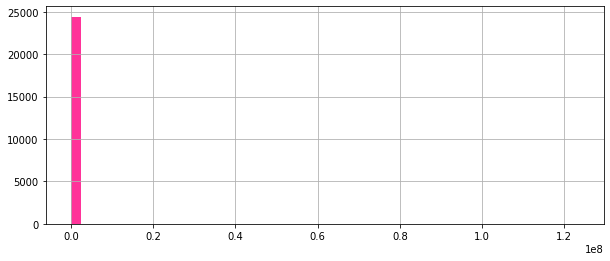

In [429]:
df.price.hist(bins=50,figsize=(10, 4),color='#FF3399')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d0655e410>]],
      dtype=object)

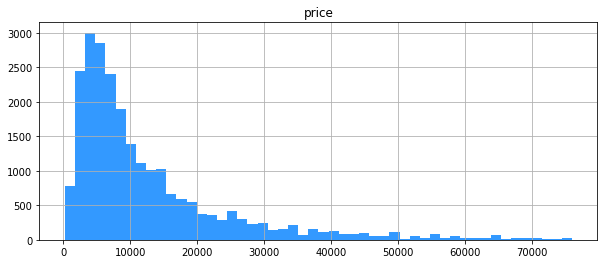

In [430]:
q_low = df["price"].quantile(0.01)
q_hi  = df["price"].quantile(0.99)
df_filtered = df[(df["price"] < q_hi) & (df["price"] > q_low)]
df_filtered.hist(column='price',bins=50,figsize=(10, 4),color='#3399ff')

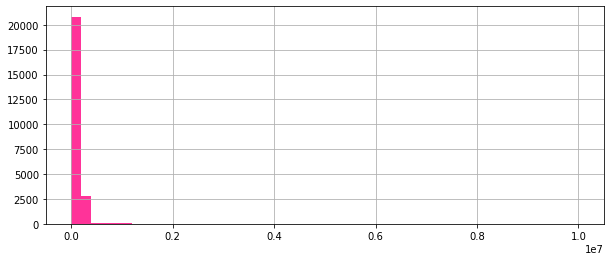

In [431]:
df_filtered.odometer.hist(bins=50,figsize=(10, 4),color='#FF3399')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d0659c350>]],
      dtype=object)

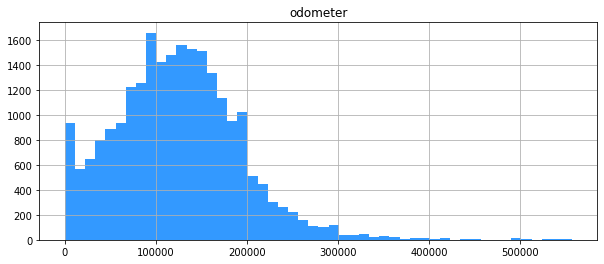

In [432]:
q_low = df_filtered["odometer"].quantile(0.01)
q_hi  = df_filtered["odometer"].quantile(0.99)
df_filtered = df_filtered[(df_filtered["odometer"] < q_hi) & (df_filtered["odometer"] > q_low)]
df_filtered.hist(column='odometer',bins=50,figsize=(10, 4),color='#3399ff')

In [433]:
df_filtered.shape

(23442, 27)

In [434]:
pd.concat([df[['price','odometer']].describe(), 
                df_filtered[['price','odometer']].describe()],
                axis=1, 
                keys=['with outliers', 'outliers removed'])

with outliers                outliers removed             
                price       odometer            price     odometer
count     24424.00000    24424.00000      23442.00000  23442.00000
mean      24236.20193   139590.39551      12388.76295 124138.29929
std     1068544.58440   325329.64360      12115.90658  69013.32927
min           1.00000        0.00000        225.00000    102.00000
25%        4500.00000    74200.00000       4595.00000  77000.00000
50%        8000.00000   120148.00000       8000.00000 121925.50000
75%       15700.00000   166000.00000      15000.00000 165192.75000
max   123456789.00000 10000000.00000      76000.00000 556650.00000

In [437]:
df.describe()

,lat,long,odometer,pID,price,weekday
count,24390.00000,24390.00000,24424.00000,24390.00000,24424.00000,24424.00000
mean,36.41096,-94.20389,139590.39551,7382001887.12542,24236.20193,2.86612
std,5.73315,17.71734,325329.64360,3120409.98254,1068544.58440,1.78870
min,-34.65668,-157.90693,0.00000,7370759716.00000,1.00000,0.00000
25%,33.00433,-112.06020,74200.00000,7380692815.75000,4500.00000,1.00000
50%,36.07615,-88.19520,120148.00000,7383031177.00000,8000.00000,3.00000
75%,40.72552,-77.48050,166000.00000,7384306209.75000,15700.00000,4.00000
max,84.80801,35.51106,10000000.00000,7385200851.00000,123456789.00000,6.00000


In [441]:
df_filtered.describe(include=[object]) 

,VIN,post_body,year make model,date,year_c make model,year,model
count,3485,23247,23442,23442,23442,23442,23442
unique,3288,21397,16162,32,15545,96,1589
top,3VW917AU4FM072742,Clean title,2010 toyota prius,2021-09-24,2010 toyota prius,2008,nan
freq,11,87,27,3324,30,1433,806


In [442]:
df_filtered.describe(include=['category'])

,city,condition,cylinders,drive,fuel,paint color,size,title status,transmission,type,dayOfWeek,make
count,23442,19472,17816,15835,23442,16961,11763,23442,23442,15598,23442,23395
unique,15,6,8,3,5,12,4,6,3,13,7,538
top,newyork,excellent,6 cylinders,4wd,gas,white,full-size,clean,automatic,sedan,Friday,FORD
freq,1742,8416,6276,5394,21457,3791,6562,21397,20382,4673,5169,3354


In [464]:
df_filtered.to_csv('/content/drive/MyDrive/Data Science/craigslistproject/cleaned_data.csv', 
                   sep='\t', 
                   encoding='utf-8', 
                   index=False)